In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "/kaggle/Boston.csv"
df = pd.read_csv(file_path)
df.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
print("\nsummary statistics:\n", df.describe())


summary statistics:
              crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std  

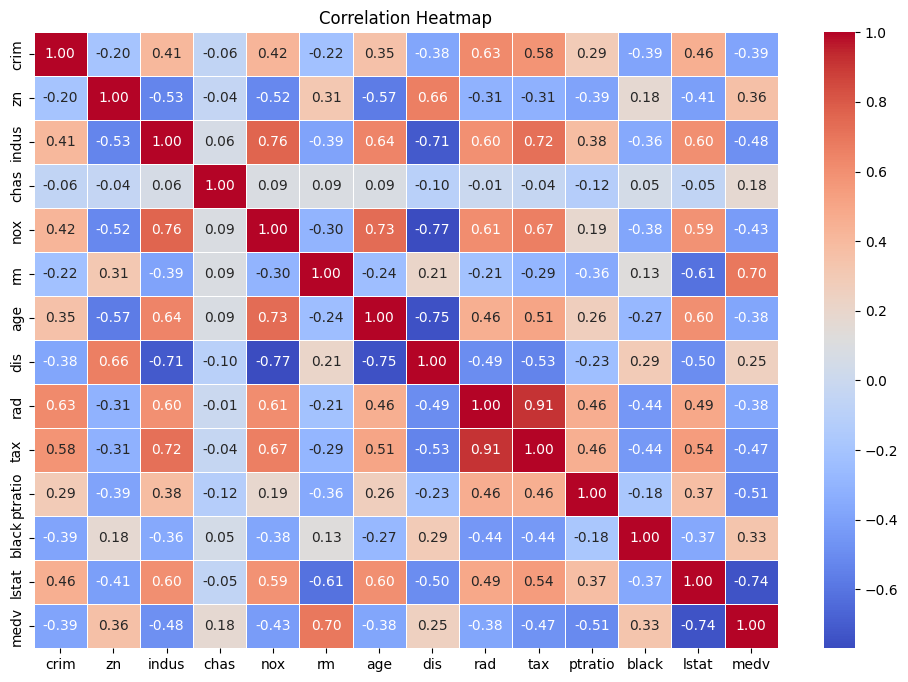

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

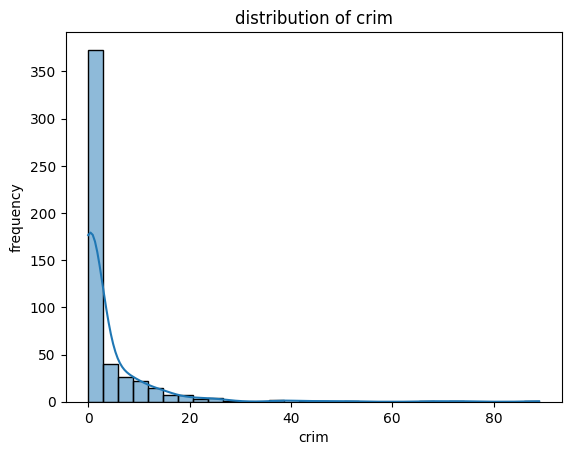

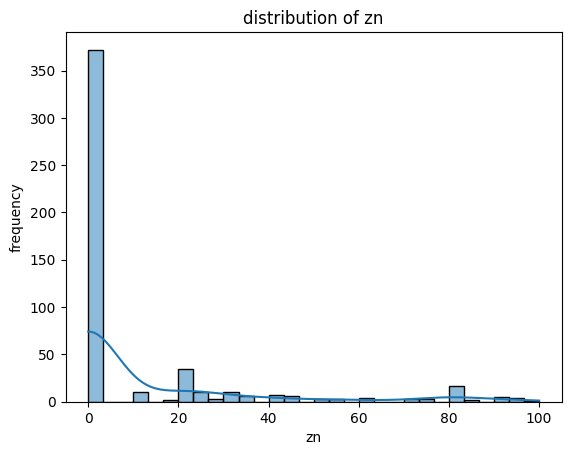

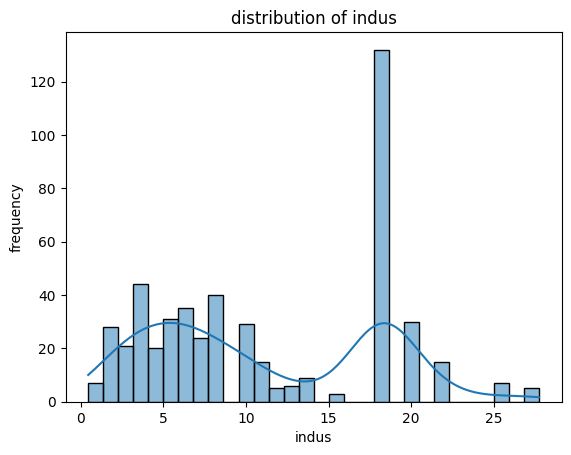

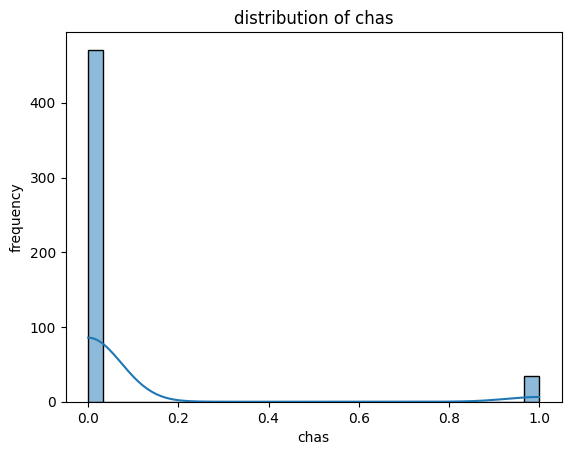

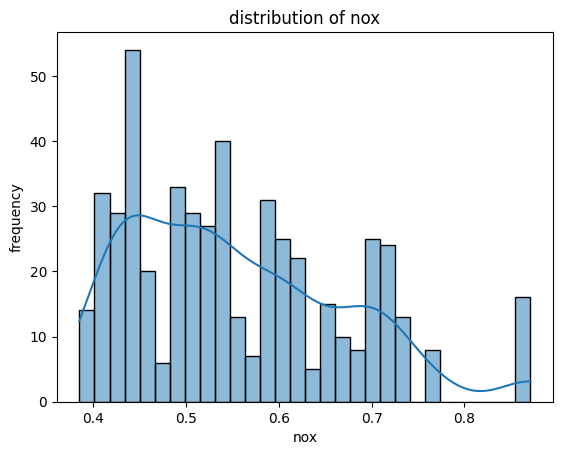

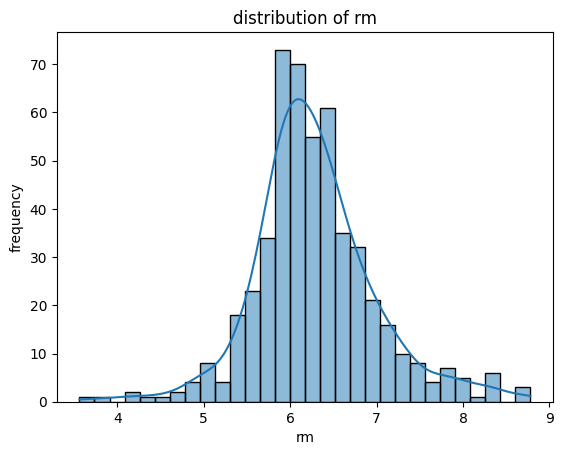

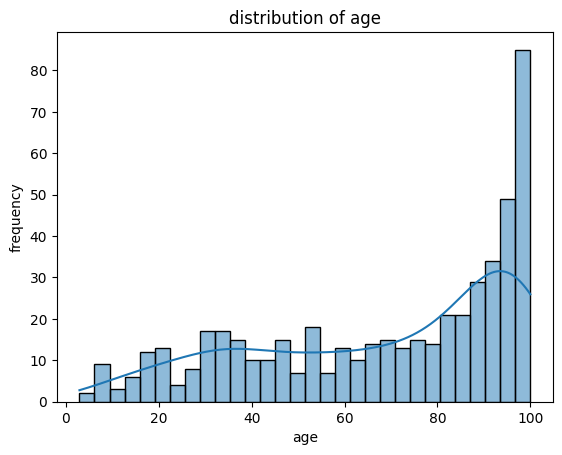

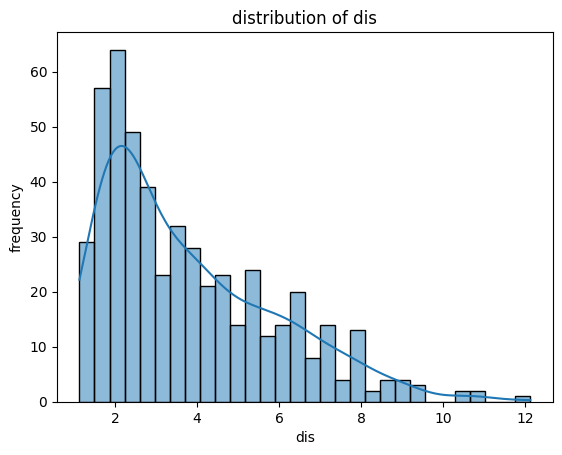

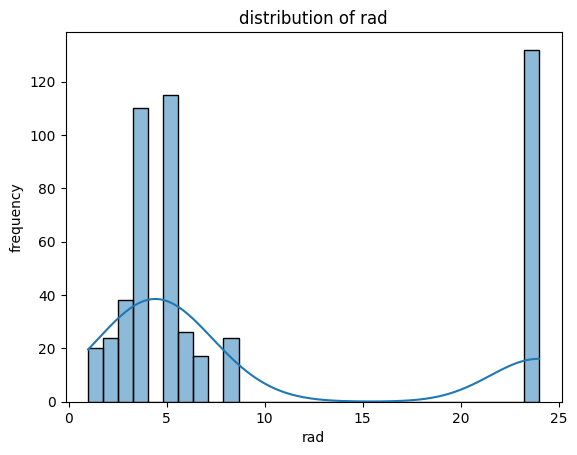

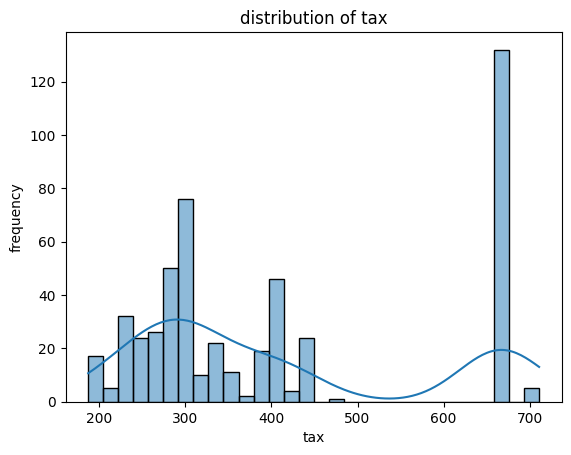

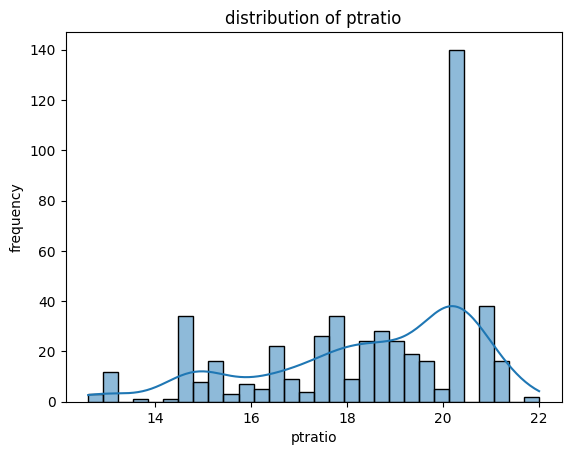

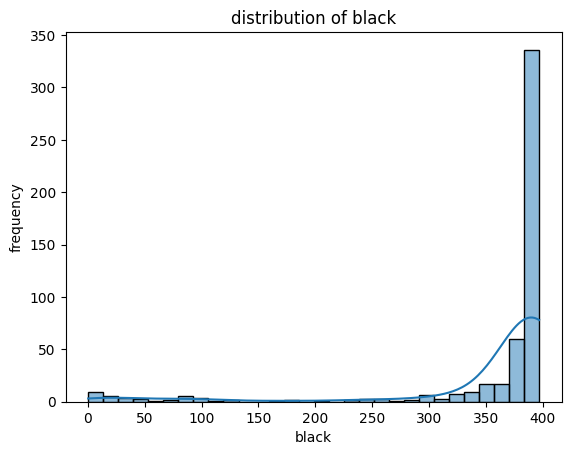

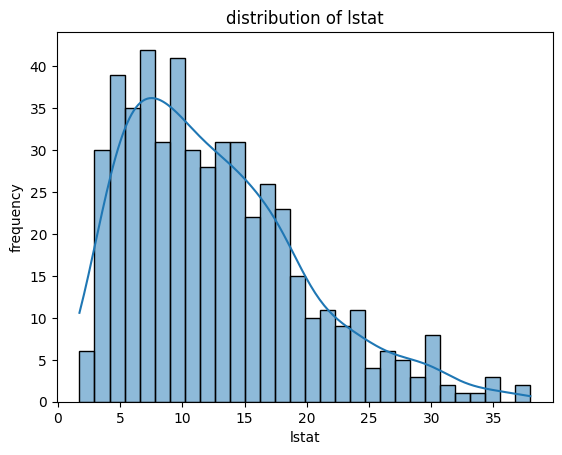

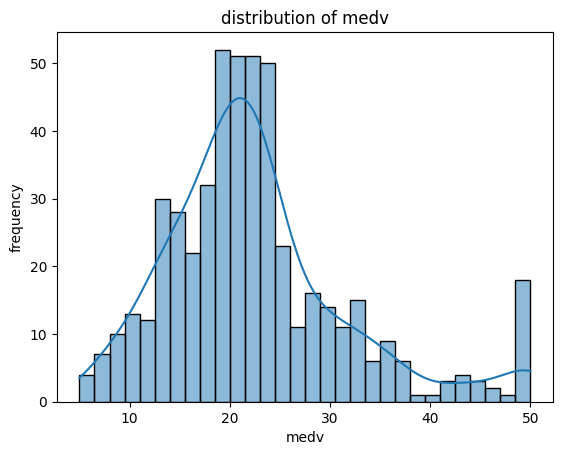

In [8]:
for col in df.columns:
  plt.figure()
  sns.histplot(df[col], bins=30, kde=True, edgecolor='black')
  plt.title(f'distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('frequency')
  plt.show()

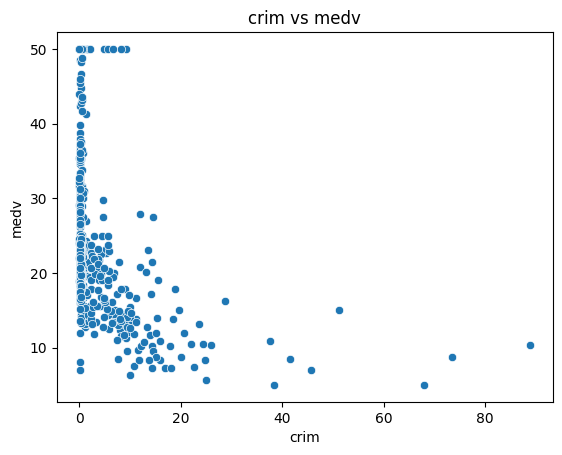

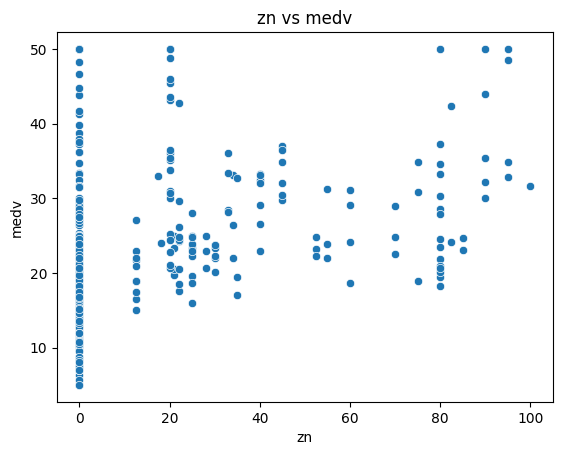

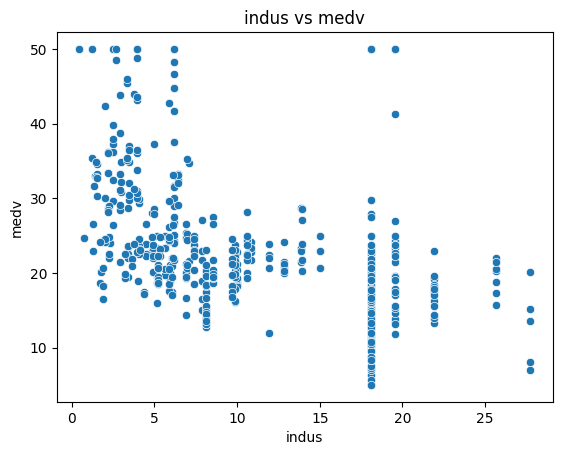

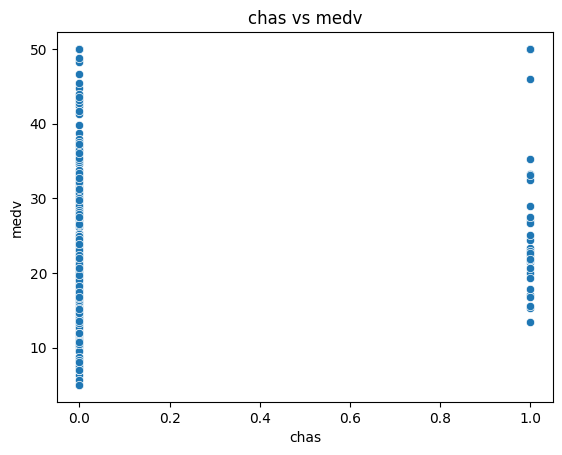

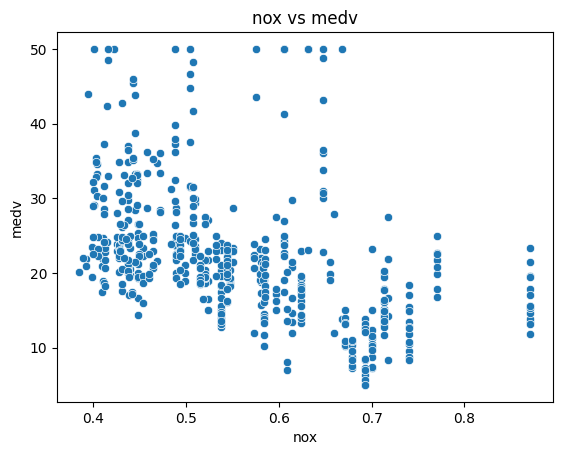

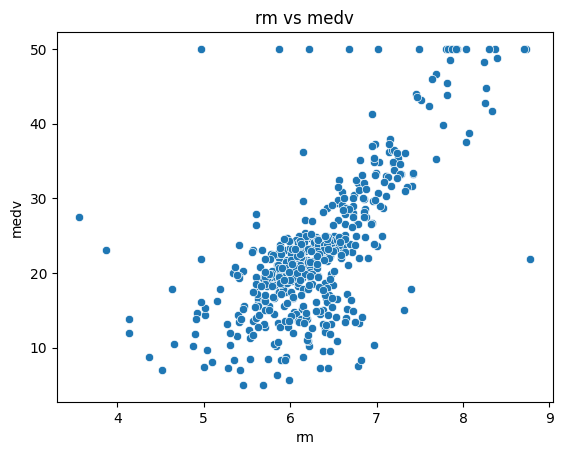

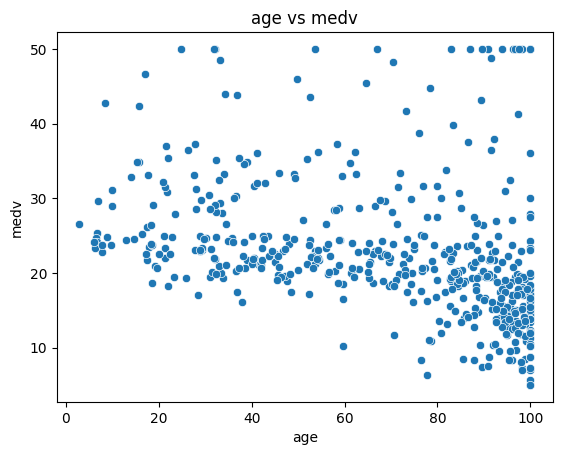

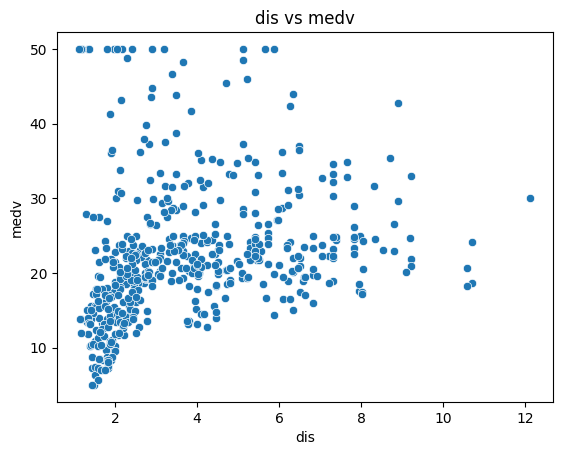

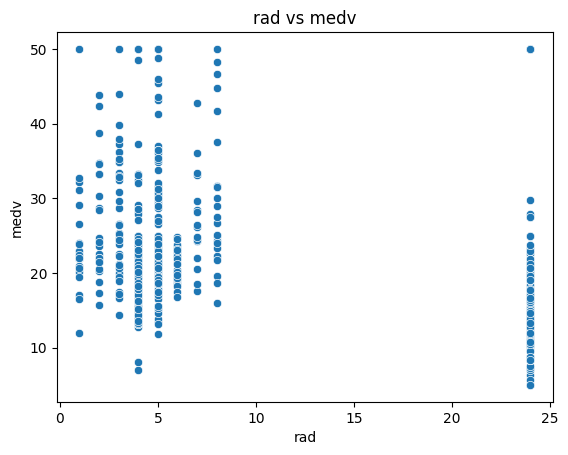

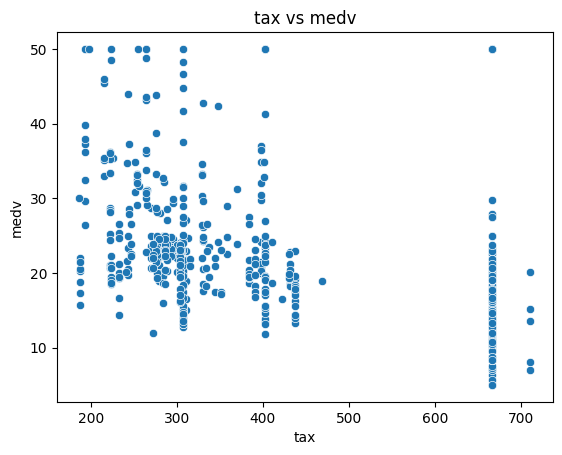

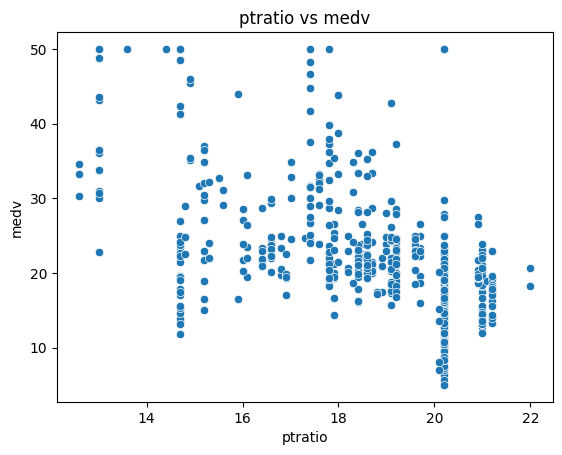

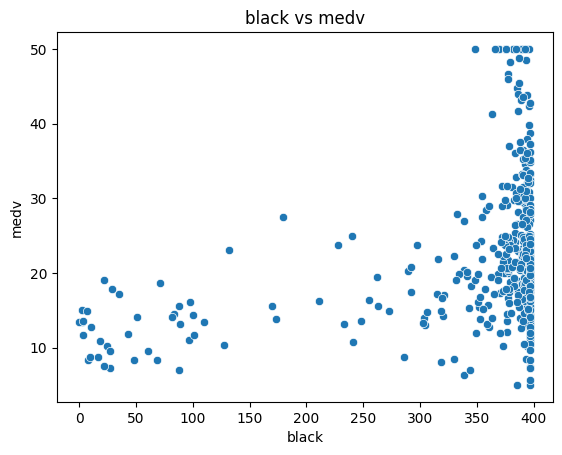

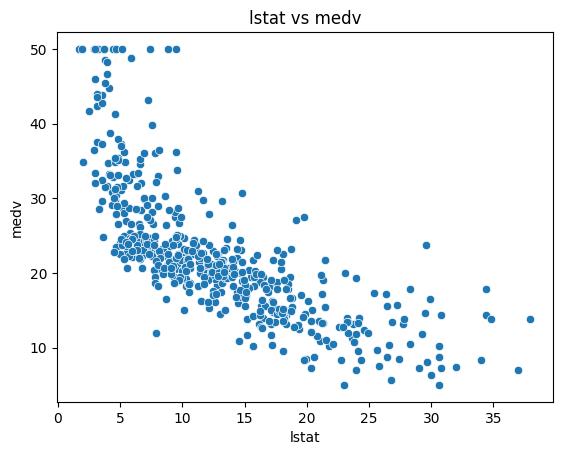

In [14]:
for col in df.columns:
  if col != 'medv':
    plt.figure()
    sns.scatterplot(x=df[col], y=df['medv'])
    plt.title(f'{col} vs medv')
    plt.xlabel(col)
    plt.ylabel('medv')
    plt.show()

In [18]:
class LinearRegression:
  def __init__(self):
    self.coef_= None
    self.intercept_= None

  def fit(self, X, y):
    X=np.array(X)
    y=np.array(y).reshape(-1,1)
    X=np.c_[np.ones(X.shape[0]), X]

    Theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    self.intercept_= Theta[0, 0]
    self.coef_= Theta[1:].flatten()

  def predict(self, X):
    X = np.array(X)
    X= np.c_[np.ones(X.shape[0]), X]
    return X.dot(np.r_[self.intercept_, self.coef_])



In [19]:
X = df.drop(columns= ['medv'])
y = df['medv']

Train_size = int(0.8 * len(df))
X_train, X_test = X.iloc[:Train_size], X.iloc[Train_size:]
y_train, y_test = y.iloc[:Train_size], y.iloc[Train_size:]

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 32.79986268020941


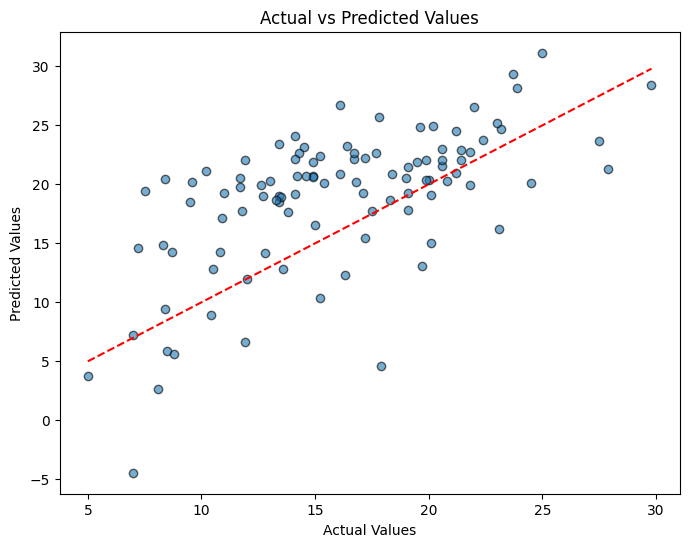

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor = 'black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linestyle = '--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("Actual vs Predicted Values")
plt.show()

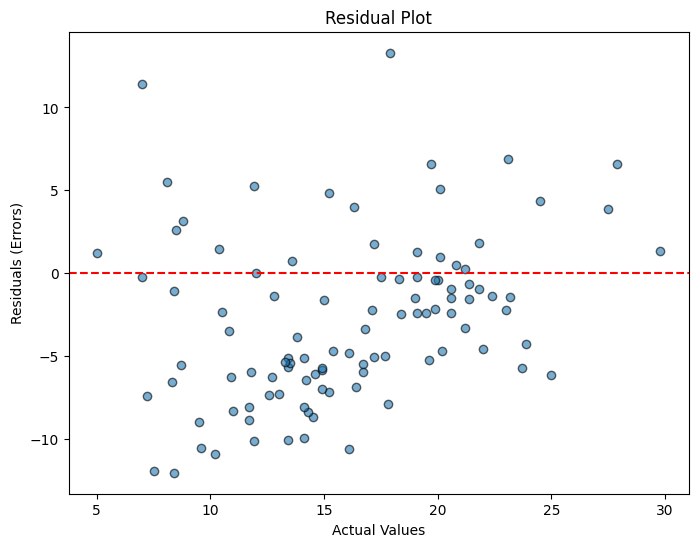

In [21]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.6, edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")
plt.show()